In [71]:
%run main.ipynb
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [72]:
def initial_analysis(stocks, weights, confidence_level = 0.95):
    data = import_data(stocks)
    returns_data = pd.DataFrame({stock: data[stock]['Return'] for stock in stocks})
    returns_data.dropna(inplace=True)
    portfolio_returns = np.dot(returns_data, weights)
    metrics = {
        'Metric': ['VaR', 'CVaR', 'Volatility', 'Return', 'Sharpe Ratio'],
        'Value': []
    }
    # create corrolation matrix
    corr = returns_data.corr()
    mask = np.triu(np.ones_like(corr, dtype=bool))
    plt.figure(figsize=(8, 6))
    sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
    plt.title("Stock Returns Correlation Matrix")
    plt.show()
    # compute VaR
    var = np.percentile(portfolio_returns, 100 * (1 - confidence_level))
    # compute CVaR
    cvar = "{:,.2%}".format(portfolio_returns[portfolio_returns <= var].mean())
    var = "{:,.2%}".format(var)
    # compute portfolio volatility
    p_volatility = "{:,.2%}".format(portfolio_volatility(data, weights))
    # compute expected portfolio return
    p_return = "{:,.2%}".format(portfolio_return(data, weights))
    # compute sharpe ratio
    sharpe = round(sharpe_ratio(data, weights), 2)
    # record results and display
    metrics['Value'].extend([var, cvar, p_volatility, p_return, sharpe])
    display = pd.DataFrame.from_dict(metrics)
    
    return display

In [73]:
def final_analysis(stocks, weights, confidence_level = 0.95):
    data = import_data(stocks)
    returns_data = pd.DataFrame({stock: data[stock]['Return'] for stock in stocks})
    returns_data.dropna(inplace=True)
    metrics = {
        'Metric': ['VaR', 'CVaR', 'Volatility', 'Return', 'Sharpe Ratio'],
        'Value': []
    }
    # optimize portfolio
    optimize = portfolio_optimization(data, weights, alpha=0.5)
    optimized_weights = np.array(optimize['Optimal Portfolio'])
    portfolio_returns = np.dot(returns_data, optimized_weights)
    # plot convergence
    plt.figure(figsize=(8, 4))
    plt.plot(optimize['Iteration'], optimize['Sharpe Ratio'], marker='o', color='blue', markersize='5', label='Sharpe Ratio')

    plt.xlabel('Iteration', fontsize=12)
    plt.ylabel('Sharpe Ratio', fontsize=12)
    plt.title('Sharpe Ratio Convergence Over Iterations', fontsize=14, fontweight='bold')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.5)

    plt.show()
    # compute VaR
    var = np.percentile(portfolio_returns, 100 * (1 - confidence_level))
    # compute CVaR
    cvar = "{:,.2%}".format(portfolio_returns[portfolio_returns <= var].mean())
    var = "{:,.2%}".format(var)
    # compute portfolio volatility
    p_volatility = "{:,.2%}".format(portfolio_volatility(data, optimized_weights))
    # compute expected portfolio return
    p_return = "{:,.2%}".format(portfolio_return(data, optimized_weights))
    # compute sharpe ratio
    sharpe = round(sharpe_ratio(data, optimized_weights), 2)
    # record results and display
    metrics['Value'].extend([var, cvar, p_volatility, p_return, sharpe])
    display = pd.DataFrame.from_dict(metrics)
    
    return display

**Note to user:** Make sure all lines of code above this markdown are ran before further usage.

In [77]:
# enter portfolio information here
stocks = []
weights = []

**Example:** If this is my current stock portfolio:

| Stock | Weight |
|-|-|
| NVDA | 10% |
| MA | 70% |
| NFLX | 5% |
| CMG | 7% |
| MNST | 8% |

then my inputs would be,

```
stocks = ['NVDA', 'MA', 'NFLX', 'CMG', 'MNST']
weights = [0.10, 0.70, 0.05, 0.07, 0.08]
```


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


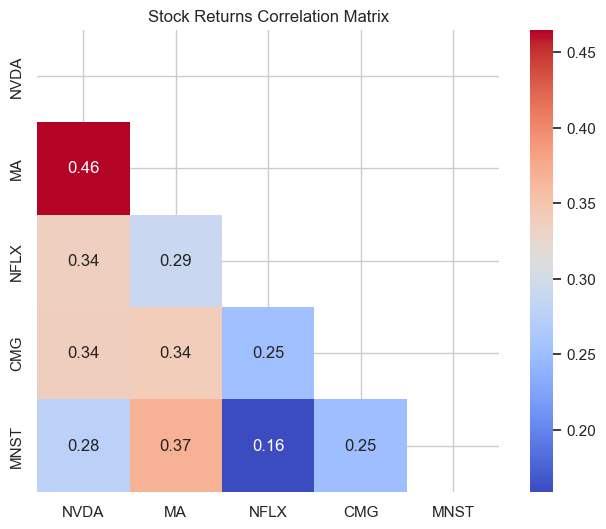

,Metric,Value
0,VaR,-2.36%
1,CVaR,-3.62%
2,Volatility,24.66%
3,Return,32.90%
4,Sharpe Ratio,1.17


In [78]:
# run this cell to see initial portfolio metrics
display = initial_analysis(stocks, weights)
display

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Total Iterations Completed: 16
Sharpe Ratio: 1.5093494978732844
Computed Optimal Portfolio: 
NVDA    30.85%
MA      10.84%
NFLX    20.38%
CMG     19.35%
MNST    18.57%
dtype: object


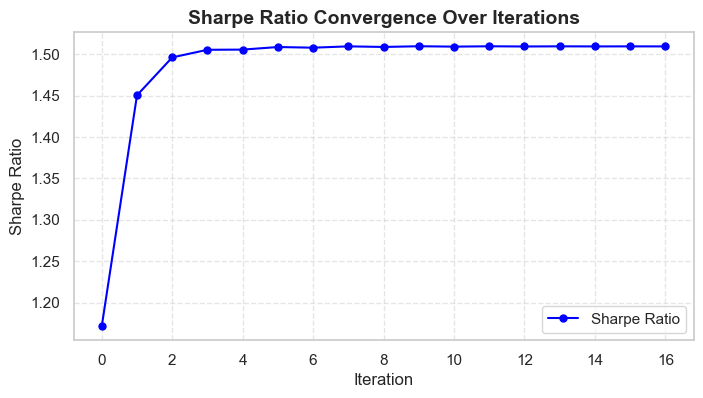

,Metric,Value
0,VaR,-2.58%
1,CVaR,-3.91%
2,Volatility,27.29%
3,Return,45.19%
4,Sharpe Ratio,1.51


In [79]:
# run this cell to see optimized portfolio metrics
optimized_display = final_analysis(stocks, weights)
optimized_display